In [4]:
from sklearn.datasets import fetch_openml

In [5]:
mnist = fetch_openml('mnist_784',as_frame=False)

In [6]:
x,y = mnist['data'],mnist['target']

In [7]:
x.shape

(70000, 784)

In [8]:
y.shape

(70000,)

In [9]:
%matplotlib inline

In [10]:
import matplotlib
import matplotlib.pyplot as plt

In [11]:
some_digit = x[36001]
some_digit_image = some_digit.reshape(28,28)

(-0.5, 27.5, 27.5, -0.5)

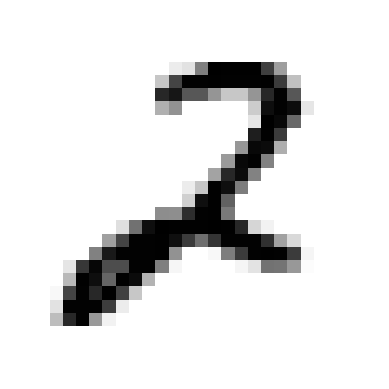

In [12]:
plt.imshow(some_digit_image,cmap=matplotlib.cm.binary, interpolation="nearest")
plt.axis("off")

In [13]:
y[36001]

'2'

In [14]:
x_train, x_test = x[:60000],x[60000:]

In [15]:
y_train, y_test = y[:60000],y[60000:]


In [16]:
import numpy as np
shuffle_index = np.random.permutation(60000)
x_train, y_train = x_train[shuffle_index], y_train[shuffle_index]

Creating a 2 Detector


In [23]:
y_train = y_train.astype(np.int8)
y_test = y_test.astype(np.int8)

y_train_2 = (y_train==2)
y_test_2 = (y_test==2)

In [24]:
y_train

array([3, 6, 0, ..., 4, 0, 9], dtype=int8)

In [25]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=int8)

In [18]:
y_train_2

array([False, False, False, ..., False, False, False])

In [19]:
y_test_2


array([False,  True, False, ..., False, False, False])

In [26]:
from sklearn.linear_model import LogisticRegression

In [34]:
clf = LogisticRegression(tol=0.1,solver='lbfgs')

In [35]:
clf.fit(x_train,y_train_2)

c:\Users\keenk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(tol=0.1)

In [36]:
clf.predict([some_digit])

array([ True])

In [37]:
from sklearn.model_selection import cross_val_score
a = cross_val_score(clf,x_train,y_train_2,cv=3,scoring="accuracy")

c:\Users\keenk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\keenk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

In [38]:
a.mean()

0.9785833333333334